In [ ]:
#Data.csv

**Step 1: Importing the libraries**

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('Data.csv')

**Step 2: Importing dataset**

In [3]:
df=pd.read_csv('Data.csv')

In [5]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [6]:
df.shape
#df.describe()

(10, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [8]:
df.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [9]:
k=df['Age'].median()

In [10]:
df['Age'].fillna(value = k, inplace = True)

In [11]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,38.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


**Step 3: Handling the missing data**

In [12]:
df['Salary'].mean()

63777.77777777778

In [13]:
df['Salary'].fillna(value = 63780, inplace = True)

In [14]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,63780.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,38.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


**Step 4: Encoding categorical data**

In [15]:
df['Purchased']=df['Purchased'].map({'Yes':1,'No':0})

In [16]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,0
1,Spain,27.0,48000.0,1
2,Germany,30.0,54000.0,0
3,Spain,38.0,61000.0,0
4,Germany,40.0,63780.0,1
5,France,35.0,58000.0,1
6,Spain,38.0,52000.0,0
7,France,48.0,79000.0,1
8,Germany,50.0,83000.0,0
9,France,37.0,67000.0,1


**Step 5: Creating a dummy variable**

In [17]:
dv=pd.get_dummies(df.Country)
dv

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0
5,1,0,0
6,0,0,1
7,1,0,0
8,0,1,0
9,1,0,0


In [18]:
merged=pd.concat([df,dv],axis='columns')
merged

,Country,Age,Salary,Purchased,France,Germany,Spain
0,France,44.0,72000.0,0,1,0,0
1,Spain,27.0,48000.0,1,0,0,1
2,Germany,30.0,54000.0,0,0,1,0
3,Spain,38.0,61000.0,0,0,0,1
4,Germany,40.0,63780.0,1,0,1,0
5,France,35.0,58000.0,1,1,0,0
6,Spain,38.0,52000.0,0,0,0,1
7,France,48.0,79000.0,1,1,0,0
8,Germany,50.0,83000.0,0,0,1,0
9,France,37.0,67000.0,1,1,0,0


In [19]:
final_df=merged.drop(['Country','Spain'],axis='columns')

In [20]:
final_df

,Age,Salary,Purchased,France,Germany
0,44.0,72000.0,0,1,0
1,27.0,48000.0,1,0,0
2,30.0,54000.0,0,0,1
3,38.0,61000.0,0,0,0
4,40.0,63780.0,1,0,1
5,35.0,58000.0,1,1,0
6,38.0,52000.0,0,0,0
7,48.0,79000.0,1,1,0
8,50.0,83000.0,0,0,1
9,37.0,67000.0,1,1,0


In [21]:
import pandas as pd # handle the data
from sklearn.model_selection import train_test_split # split the data

from sklearn import metrics # evaluation metrics
import seaborn as sn # plotting the data
import matplotlib.pyplot as plt # plotting the data

**Step 6: Splitting the datasets into training sets and Test sets**

In [22]:
X = final_df[['Age', 'Salary','France','Germany']].values # fts
y = final_df['Purchased'].values # target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0) # train- test split

In [23]:
X_train

array([[3.7e+01, 6.7e+04, 1.0e+00, 0.0e+00],
       [2.7e+01, 4.8e+04, 0.0e+00, 0.0e+00],
       [3.8e+01, 5.2e+04, 0.0e+00, 0.0e+00],
       [4.8e+01, 7.9e+04, 1.0e+00, 0.0e+00],
       [3.8e+01, 6.1e+04, 0.0e+00, 0.0e+00],
       [4.4e+01, 7.2e+04, 1.0e+00, 0.0e+00],
       [3.5e+01, 5.8e+04, 1.0e+00, 0.0e+00]])

In [24]:
y_train

array([1, 1, 0, 1, 0, 0, 1], dtype=int64)

**Step 7: Feature Scaling**

In [25]:
from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialis
scaler.fit(X_train) # find the values of mu and sigma
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it

In [26]:
X_train

array([[-0.18509793,  0.44897083,  0.8660254 ,  0.        ],
       [-1.80470477, -1.41706417, -1.15470054,  0.        ],
       [-0.02313724, -1.0242147 , -1.15470054,  0.        ],
       [ 1.59646961,  1.62751925,  0.8660254 ,  0.        ],
       [-0.02313724, -0.14030338, -1.15470054,  0.        ],
       [ 0.94862687,  0.94003267,  0.8660254 ,  0.        ],
       [-0.50901929, -0.43494049,  0.8660254 ,  0.        ]])

In [27]:
from sklearn.linear_model import LogisticRegression #main code that build the LR model 
logistic_regression= LogisticRegression() #initialise the required package
logistic_regression.fit(X_train,y_train) #magic happens - best values of betas - training/learning happens here
y_pred=logistic_regression.predict(X_test)

In [28]:
logistic_regression.predict_proba(X_test)

array([[0.43810566, 0.56189434],
       [0.8208203 , 0.1791797 ],
       [0.66475574, 0.33524426]])

In [29]:
logistic_regression.coef_

array([[-0.63776772,  0.10360984,  0.71294179,  0.        ]])

In [30]:
logistic_regression.intercept_

array([0.3167526])

C:\Users\chandru\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


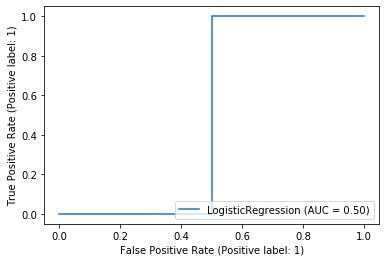

In [31]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
#confusion_matrix(y_test,y_pred)
#f1_score(y_test,y_pred)
# fpr, tpr, thresholds = roc_curve(y_test, y_test_predictions, pos_label=2)
plot_roc_curve(logistic_regression, X_test, y_test)

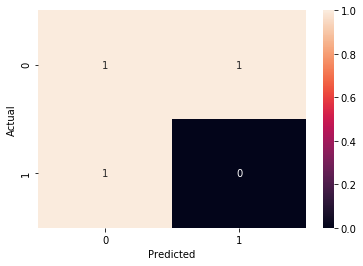

In [32]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)